# <center> <font color ="RED" > TCS_Stock_Data_Analysis_ans_Prediction </font><center>

# <font color = 'Green'> Step :1 Importing Required Libraries </font>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plty
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error,r2_score
from tqdm import tqdm

import os
import datetime
import warnings
warnings.filterwarnings("ignore")

# <font color = 'Green' >Step :2 Load DataSet </font>

In [6]:
fd = pd.read_csv("/content/TCS_stock_history.csv", encoding ='latin1')
fd['Date'] = pd.to_datetime(fd['Date'])
fd.sort_values(by = 'Date',inplace = True)
fd.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


# <font color = 'green'>Step :3 Data Preprocessing

In [7]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB


In [8]:
# Check for null values and handle them
print(fd.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [9]:
fd.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [10]:
fd.corr()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [11]:
corel_with_close = fd.corr()['Close']
corel_with_close

,Close
Date,0.899214
Open,0.999787
High,0.999914
Low,0.999901
Close,1.000000
Volume,-0.152844
Dividends,0.060179
Stock Splits,-0.006635


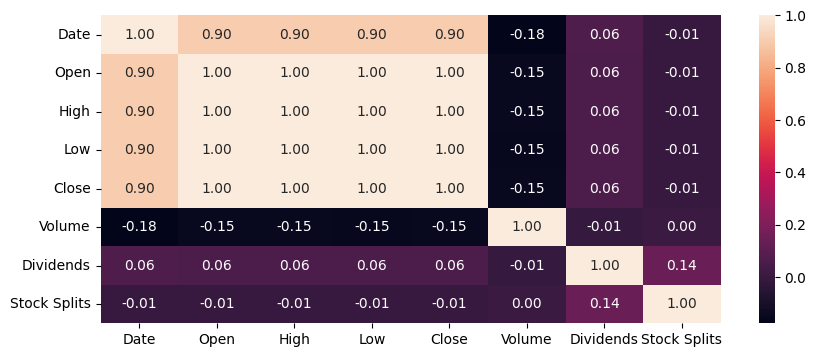

In [12]:
plt.figure(figsize = (10,4))
sns.heatmap(fd.corr(),annot = True,fmt = '.2f')
plt.show()

# <font color = 'green'>Step :4 Exploratory Data Analysis

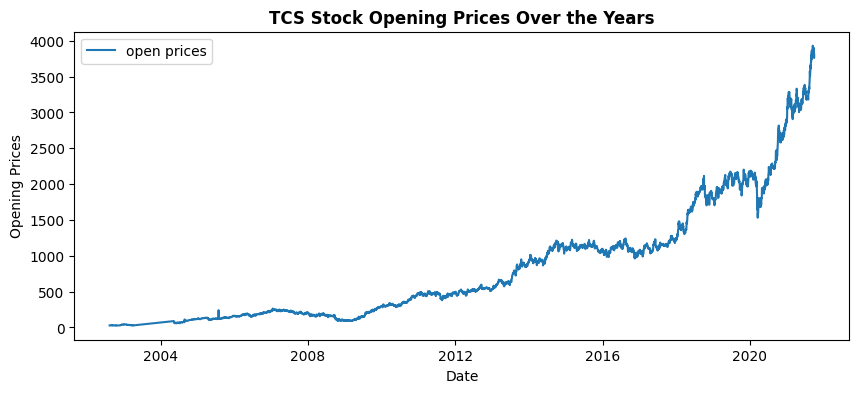

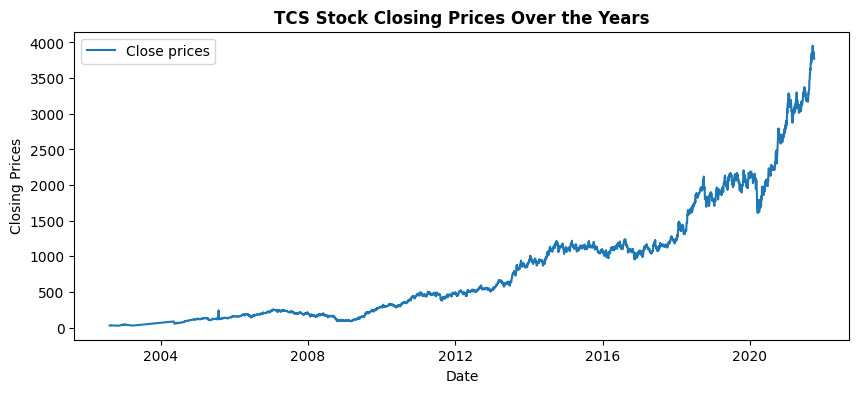

In [13]:
plt.figure(figsize = (10,4))
sns.lineplot(data = fd,x = fd['Date'],y = fd['Open'],label = 'open prices')
plt.xlabel('Date')
plt.ylabel('Opening Prices')
plt.title('TCS Stock Opening Prices Over the Years',weight = 'bold')
plt.show()
plt.figure(figsize = (10,4))
sns.lineplot(data = fd,x = fd['Date'],y = fd['Close'],label = 'Close prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('TCS Stock Closing Prices Over the Years',weight = 'bold')
plt.show()

### Volume, Dividends, Stock Splits

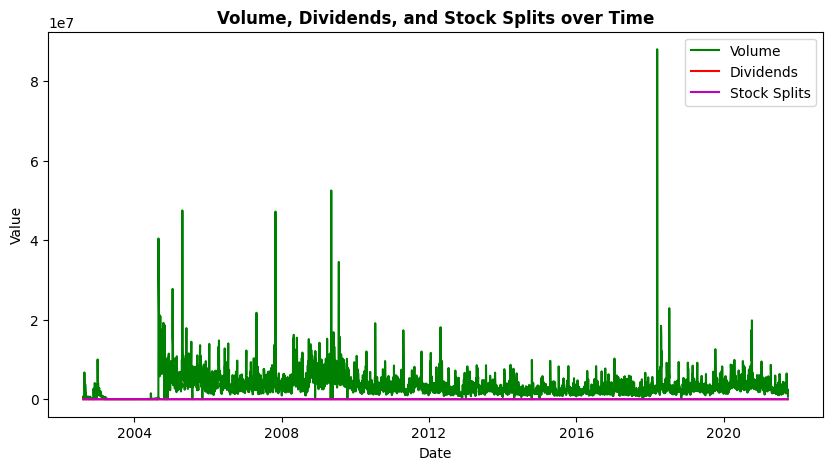

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(fd['Date'], fd['Volume'], label='Volume', color='g')
plt.plot(fd['Date'], fd['Dividends'], label='Dividends', color='r')
plt.plot(fd['Date'], fd['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

### Close vs Volume

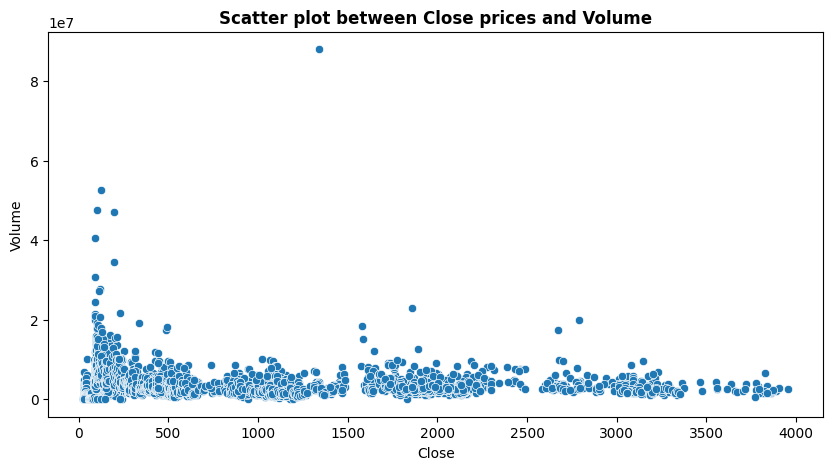

In [15]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = fd,x = fd['Close'],y = fd['Volume'],legend = True)
plt.title('Scatter plot between Close prices and Volume',weight = 'bold')
plt.show()


### Stock Splits vs. Close Price

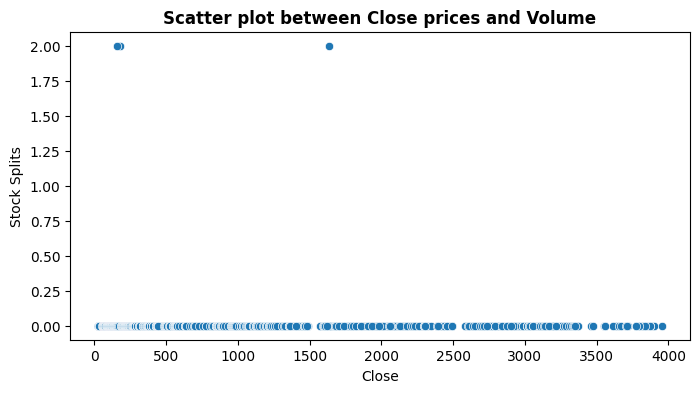

In [17]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = fd,x = fd['Close'],y = fd['Stock Splits'],legend = True)
plt.title('Scatter plot between Close prices and Volume',weight = 'bold')
plt.show()

### Dividends and Stock Splits

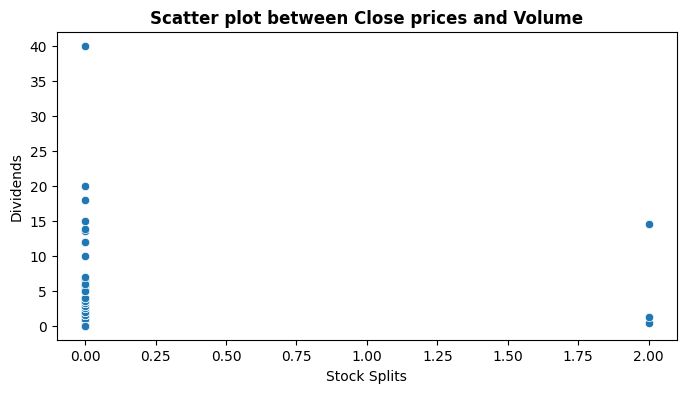

In [18]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = fd,x = fd['Stock Splits'],y = fd['Dividends'],legend = True)
plt.title('Scatter plot between Close prices and Volume',weight = 'bold')
plt.show()

### Moving Averages

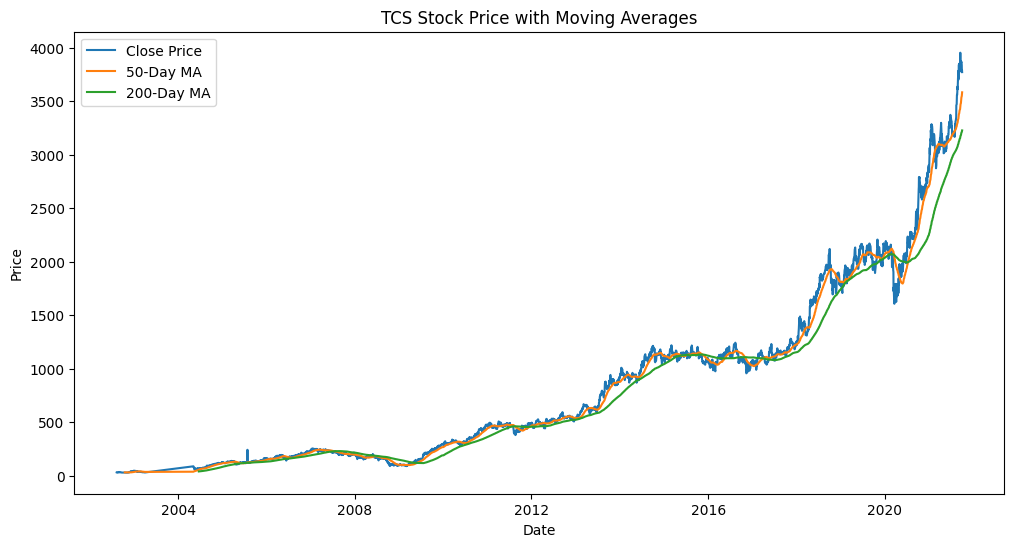

In [19]:
#Calculating 50-day and 200-day moving averages

fd['MA50'] = fd['Close'].rolling(window=50).mean()
fd['MA200'] = fd['Close'].rolling(window=200).mean()

#Plot with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(fd['Date'], fd['Close'], label='Close Price')
plt.plot(fd['Date'], fd['MA50'], label='50-Day MA')
plt.plot(fd['Date'], fd['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

### Daily Price Change

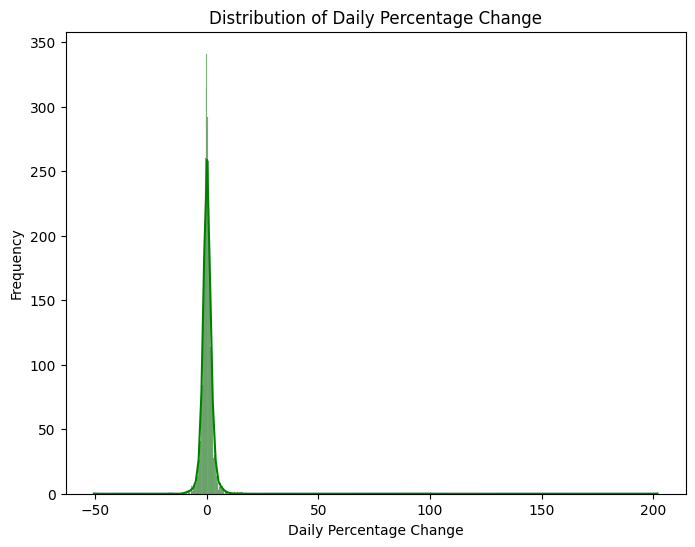

In [20]:
fd['Daily_Price_Change'] = fd['Close'].pct_change() * 100

# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(fd['Daily_Price_Change'].dropna(), kde=True,color='green')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [21]:
fd['Moving_Avg_Close'] = fd['Close'].rolling(window=7).mean()

# <font color = 'green'>Step :5 Training The Model

In [22]:
fd.shape
fd.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Daily_Price_Change,Moving_Avg_Close
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,NaN,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,NaN,NaN,-1.353915,NaN
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,NaN,NaN,-6.894351,NaN


In [24]:
x_train = fd['Close'].values.reshape(-1,1)
y_train = fd['Close'].shift(-1).dropna().values
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

In [25]:
test_ratio = 0.2
test_size = int(len(fd) * test_ratio)
test_data = fd[-test_size:]

In [27]:
x_test = test_data['Close'].values.reshape(-1, 1)
x_test_scaled = sc.transform(x_test)
x_test_lstm = x_test_scaled.reshape(-1, 1, 1)

x_train_lstm = x_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = x_train_scaled[1:]

In [30]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Set the number of epochs and batch size
epochs = 30
batch_size = 15


In [37]:
# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):

 for i in range(0, len(x_test_lstm), batch_size):

  x_batch = x_train_lstm[i:i+batch_size]
  y_batch = y_train_lstm[i:i+batch_size]
  model.train_on_batch(x_batch, y_batch)

100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


In [42]:
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = sc.transform(X_test)


In [43]:
#Predictions using LSTM

lstm_predictions = model.predict(X_test_lstm).flatten()

X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [46]:
#Inverse transform of the predictions

lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = sc.inverse_transform(lstm_predictions)


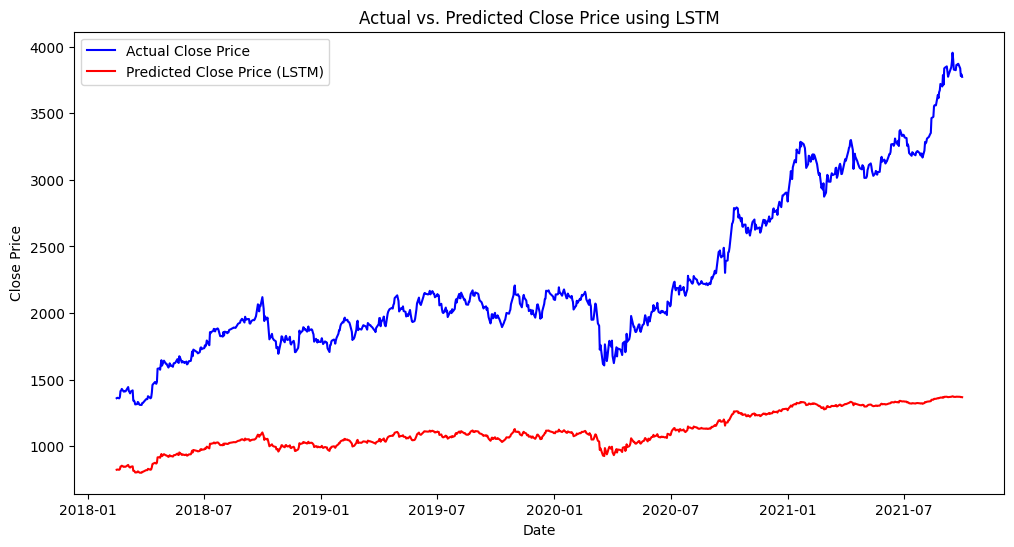

In [49]:
# Visualization of LSTM predictions

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

In [51]:
# Mean Absolute Error

lstm_mae = mean_squared_error(test_data['Close'],lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 1524811.41300049


In [53]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = sc.inverse_transform(lstm_predictions)
date_index = test_data.index[-len(lstm_predictions):]
predictions_df = pd.DataFrame({'Date': date_index,'Predicted_Close': lstm_predictions.flatten()})
predictions_df.to_csv('predictions.csv', index=False)